In [5]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

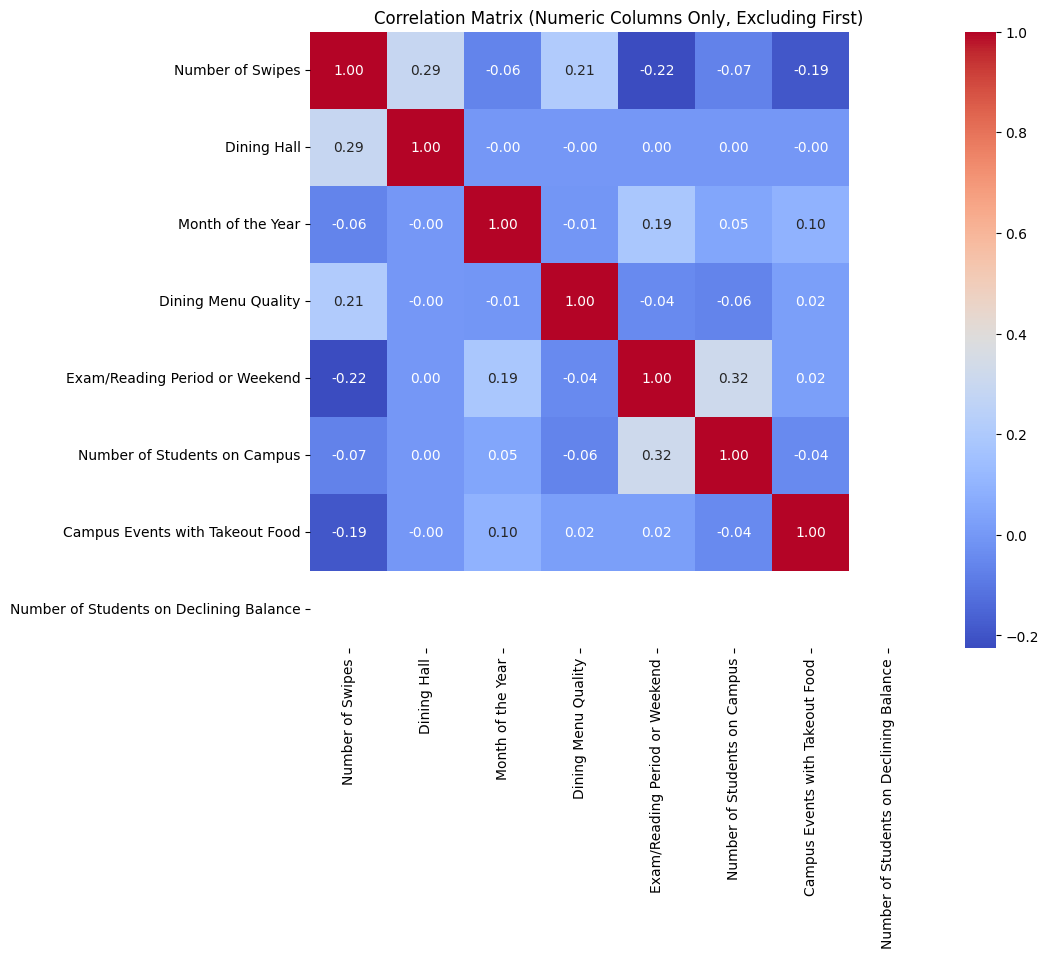

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
# Only keep numeric columns and exclude the first column
numeric_df = df.select_dtypes(include='number').iloc[:, 1:]

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Numeric Columns Only, Excluding First)')
plt.show()

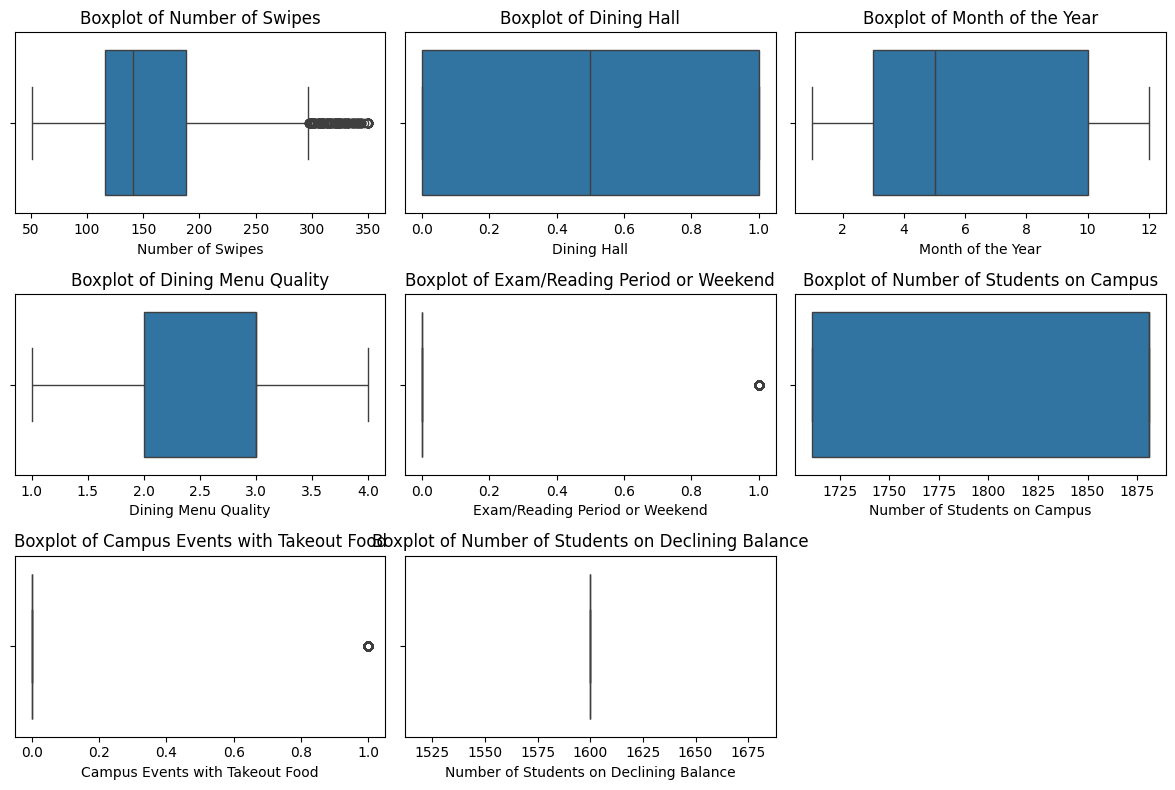

In [7]:
## boxplot the distribution of each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=numeric_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [ ]:
mean = df['Number of Swipes'].mean()
variance = df['Number of Swipes'].var()
print(f"Mean: {mean}, Variance: {variance}")


Mean: 159.70486111111111, Variance: 3714.9667042228284


In [8]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Rename columns for formula compatibility
df_renamed = df.rename(columns={
    "Number of Swipes": "Swipes",
    "Time Interval": "TimeInterval",
    "Dining Hall": "DiningHall",
    "Month of the Year": "Month",
    "Dining Menu Quality": "MenuQuality",
    "Exam/Reading Period or Weekend": "ExamPeriod",
    "Number of Students on Campus": "StudentsOnCampus",
    "Campus Events with Takeout Food": "TakeoutEvent",
    "Number of Students on Declining Balance": "DecliningBalance"
})

# Define model formula
model_formula = (
    "Swipes ~ TimeInterval + DiningHall + Month + MenuQuality + "
    "ExamPeriod + StudentsOnCampus + TakeoutEvent + DecliningBalance"
)

# Split into train and test sets
train_df, test_df = train_test_split(df_renamed, test_size=0.2, random_state=42)

# Fit the Negative Binomial model on training data
neg_binom_model = smf.glm(
    formula=model_formula,
    data=train_df,
    family=sm.families.NegativeBinomial()
).fit()

# Predict on test data
test_df['predicted_swipes'] = neg_binom_model.predict(test_df)

# Evaluate model accuracy
mae = mean_absolute_error(test_df['Swipes'], test_df['predicted_swipes'])
rmse = np.sqrt(mean_squared_error(test_df['Swipes'], test_df['predicted_swipes']))

print("Negative Binomial GLM Results:\n")
print(neg_binom_model.summary())
print(f"\nEvaluation on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Compute McFadden's Pseudo R²
null_model = smf.glm(
    formula="Swipes ~ 1",
    data=train_df,
    family=sm.families.NegativeBinomial()
).fit()
pseudo_r2 = 1 - neg_binom_model.llf / null_model.llf
print(f"McFadden's Pseudo R²: {pseudo_r2:.4f}")

Negative Binomial GLM Results:

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Swipes   No. Observations:                 3225
Model:                            GLM   Df Residuals:                     3217
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19537.
Date:                Sun, 04 May 2025   Deviance:                       313.95
Time:                        16:30:41   Pearson chi2:                     362.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.03262
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercep

/Users/linguoren/miniconda3/envs/adv_ds_3.10/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/linguoren/miniconda3/envs/adv_ds_3.10/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [10]:
## linear regression
# Fit the linear regression model
linear_model = smf.ols(
    formula=model_formula,
    data=train_df
).fit()
# Predict on test data
test_df['predicted_swipes_linear'] = linear_model.predict(test_df)
# Evaluate model accuracy
mae_linear = mean_absolute_error(test_df['Swipes'], test_df['predicted_swipes_linear'])
rmse_linear = np.sqrt(mean_squared_error(test_df['Swipes'], test_df['predicted_swipes_linear']))
print("\nLinear Regression Results:\n")
print(linear_model.summary())
print(f"\nEvaluation on Test Data (Linear Regression):")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
# Compute McFadden's Pseudo R² for linear regression
null_model_linear = smf.ols(
    formula="Swipes ~ 1",
    data=train_df
).fit()
pseudo_r2_linear = 1 - linear_model.llf / null_model_linear.llf
print(f"McFadden's Pseudo R² (Linear Regression): {pseudo_r2_linear:.4f}")


Linear Regression Results:

                            OLS Regression Results                            
Dep. Variable:                 Swipes   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     125.2
Date:                Sun, 04 May 2025   Prob (F-statistic):          3.09e-163
Time:                        16:30:57   Log-Likelihood:                -17443.
No. Observations:                3225   AIC:                         3.490e+04
Df Residuals:                    3217   BIC:                         3.495e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept  

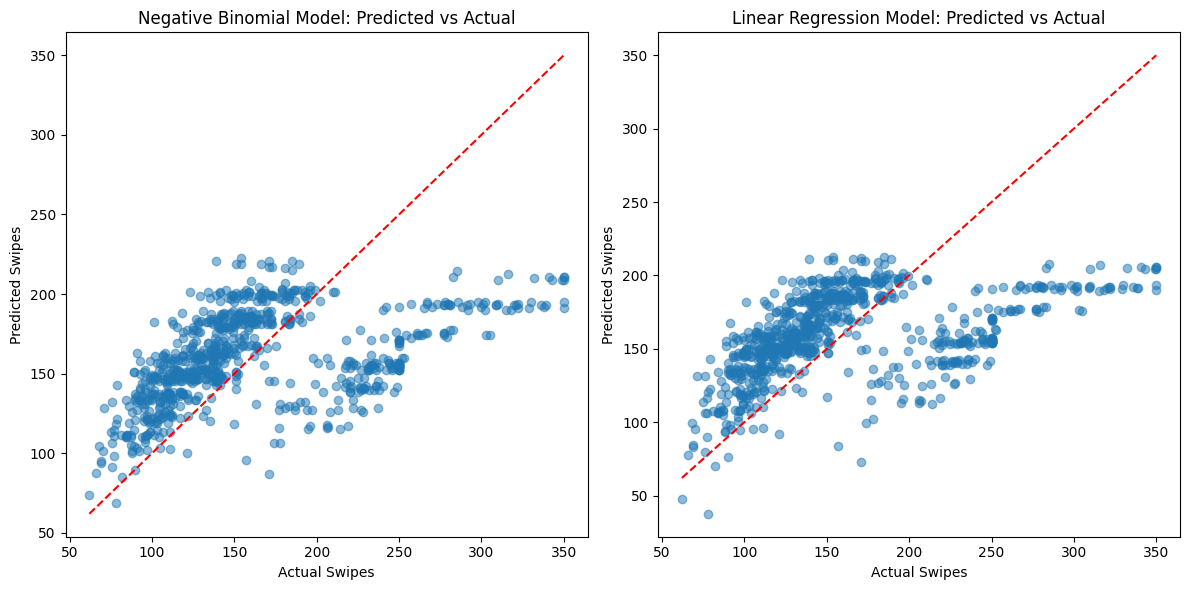

In [11]:
# Plotting the predicted vs actual values for both models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(test_df['Swipes'], test_df['predicted_swipes'], alpha=0.5)
plt.plot([test_df['Swipes'].min(), test_df['Swipes'].max()],
         [test_df['Swipes'].min(), test_df['Swipes'].max()], 'r--')
plt.title('Negative Binomial Model: Predicted vs Actual')
plt.xlabel('Actual Swipes')
plt.ylabel('Predicted Swipes')
plt.subplot(1, 2, 2)
plt.scatter(test_df['Swipes'], test_df['predicted_swipes_linear'], alpha=0.5)
plt.plot([test_df['Swipes'].min(), test_df['Swipes'].max()],
         [test_df['Swipes'].min(), test_df['Swipes'].max()], 'r--')
plt.title('Linear Regression Model: Predicted vs Actual')
plt.xlabel('Actual Swipes')
plt.ylabel('Predicted Swipes')
plt.tight_layout()
plt.show()